### *`### I worked on this notebook to clean the data as much as possible, do EDA, and then create a linear model.`*

###  Import librarys

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
from sklearn.preprocessing import StandardScaler




In [36]:
df = pd.read_csv('/content/forest_fire.csv')

In [37]:
df.tail(40)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Reason
207,208,22,8,2012,98.6,53,14,0,89.5,41.1,127.5,8,45.5,18.1,fire,NaN
208,209,23,8,2012,96.8,43,16,0,91.2,46.1,137.7,11.5,50.2,24.5,fire,NaN
209,210,24,8,2012,95,38,15,0,92.1,51.3,147.7,12.2,54.9,26.9,fire,NaN
210,211,25,8,2012,93.2,40,18,0,92.1,56.3,157.5,14.3,59.5,31.1,fire,NaN
211,212,26,8,2012,91.4F,37,16,0,92.2,61.3,167.2,13.1,64,30.3,fire,NaN
212,213,27,8,2012,96.8,54,14,0,91,65.9,177.3,10,68,26.1,fire,NaN
213,214,28,8,2012,95,56,14,0.4,79.2,37,166,2.1,30.6,6.1,not fire,NaN
214,215,29,8,2012,95,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire,NaN
215,216,30,8,2012,93.2,49,15,0,89.2,24.8,159.1,8.1,35.7,16,fire,NaN
216,217,31,8,2012,86,59,19,0,89.1,27.8,168.2,9.8,39.3,19.4,fire,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        247 non-null    int64  
 1   day          246 non-null    object 
 2   month        241 non-null    object 
 3   year         242 non-null    object 
 4   Temperature  245 non-null    object 
 5    RH          245 non-null    object 
 6    Ws          245 non-null    object 
 7   Rain         245 non-null    object 
 8   FFMC         245 non-null    object 
 9   DMC          245 non-null    object 
 10  DC           245 non-null    object 
 11  ISI          245 non-null    object 
 12  BUI          245 non-null    object 
 13  FWI          245 non-null    object 
 14  Classes      244 non-null    object 
 15  Reason       0 non-null      float64
dtypes: float64(1), int64(1), object(14)
memory usage: 31.0+ KB


In [7]:
df.isnull().sum()

,0
index,0
day,1
month,6
year,5
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2


In [8]:
df['year'].unique()

array(['2012', nan, '-', 'year', 'Cf'], dtype=object)

In [9]:
df['month'].unique()

array(['6', nan, '7', '8', '9', 'month'], dtype=object)

In [10]:
df['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', nan,
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [11]:
df['Temperature'].unique()

array(['29.00', '29', '26', '25', '27', '31', '33', '30', '28', '26c',
       '30c', '32', '34', '33c', '35', '36', '36c', '37', '22c', '22',
       '24', nan, 'Temperature', '89.6', '86', '84.2', '95F', '95',
       '82.4', '80.6', '87.8', '91.4', '93.2', '96.8', '98.6', '82.4F',
       '100.4', '102.2', '104', '100.4F', '107.6', '91.4F', '96.8F',
       '78.8', '75.2'], dtype=object)


CLEAN *DATA*

In [38]:
df.columns = df.columns.str.strip()

In [13]:
df['Classes'].unique()

array(['not  fire   ', 'not fire   ', ' not fire   ', 'fire   ',
       ' fire   ', 'TRUE', 'fire', 'fire ', 'Fire', 'not fire',
       'not fire ', nan, 'Classes  ', 'not fire     ', 'not fire    '],
      dtype=object)

In [39]:
### Fill columns
def clean_and_fill(dataframe, columns):
    for column in columns:
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

        median = dataframe[column].median()

        dataframe[column] = dataframe[column].fillna(median)

    return dataframe

columns = ['year','day','month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

df = clean_and_fill(df, columns)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        247 non-null    int64  
 1   day          247 non-null    float64
 2   month        247 non-null    float64
 3   year         247 non-null    float64
 4   Temperature  245 non-null    object 
 5   RH           247 non-null    float64
 6   Ws           247 non-null    float64
 7   Rain         247 non-null    float64
 8   FFMC         247 non-null    float64
 9   DMC          247 non-null    float64
 10  DC           247 non-null    float64
 11  ISI          247 non-null    float64
 12  BUI          247 non-null    float64
 13  FWI          247 non-null    float64
 14  Classes      244 non-null    object 
 15  Reason       0 non-null      float64
dtypes: float64(13), int64(1), object(2)
memory usage: 31.0+ KB


In [40]:
### make all value 'not fire' and 'fire'
df['Classes'] = df['Classes'].str.strip().str.lower()


df['Classes'] = df['Classes'].replace({
    'fire': 'fire',
    'fire ': 'fire',
    ' fire': 'fire',
    ' fire ': 'fire',
    'not fire': 'not fire',
    'not  fire': 'not fire',
    'not fire ': 'not fire',
    ' not fire': 'not fire',
    ' not fire ': 'not fire',
    'not fire    ': 'not fire',
    'not fire     ': 'not fire',
    'not fire   ': 'not fire',
    'not fire  ': 'not fire',
    'TRUE': 'fire',
    'true': 'fire',
    'classes': np.nan
})

df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [41]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])


In [42]:
df = df.drop('Reason' , axis = 1)

In [43]:
### Convert all Temperature value to C value

def convert_temperature(temp):
    if pd.isna(temp):
        return np.nan
    if isinstance(temp, str):
        temp = temp.strip().upper()
        if 'C' in temp:
            return pd.to_numeric(temp.replace('C', ''))
        elif 'F' in temp:
            f_temp = pd.to_numeric(temp.replace('F', ''))
            return (f_temp - 32) * 5.0 / 9.0
    temp = pd.to_numeric(temp, errors='coerce')
    if temp > 43:
        return (temp - 32) * 5.0 / 9.0
    return temp

df['Temperature'] = df['Temperature'].apply(convert_temperature)


In [44]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mode()[0])

In [45]:
df.tail()


,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,243,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
243,244,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
244,245,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,246,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,247,30.0,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [46]:
### feature Engineering
### Combine 'day' 'month' 'year' in one column and convert to datetime type

df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

medians = df[['day', 'month', 'year']].median()
df['day'].fillna(medians['day'], inplace=True)
df['month'].fillna(medians['month'], inplace=True)
df['year'].fillna(medians['year'], inplace=True)

df['date'] = pd.to_datetime(df[['year', 'month', 'day']].astype(int), errors='coerce')

print(df[['year', 'month', 'day', 'date']].head())

df.drop(['day', 'month', 'year'], axis=1, inplace=True)

print(df.head())


     year  month  day       date
0  2012.0    6.0  1.0 2012-06-01
1  2012.0    6.0  2.0 2012-06-02
2  2012.0    6.0  3.0 2012-06-03
3  2012.0    6.0  4.0 2012-06-04
4  2012.0    6.0  5.0 2012-06-05
   index  Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0      1         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1      2         29.0  61.0  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2      3         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3      4         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4      5         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

    Classes       date  
0  not fire 2012-06-01  
1  not fire 2012-06-02  
2  not fire 2012-06-03  
3  not fire 2012-06-04  
4  not fire 2012-06-05  


In [47]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,2,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
2,3,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,4,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
4,5,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05


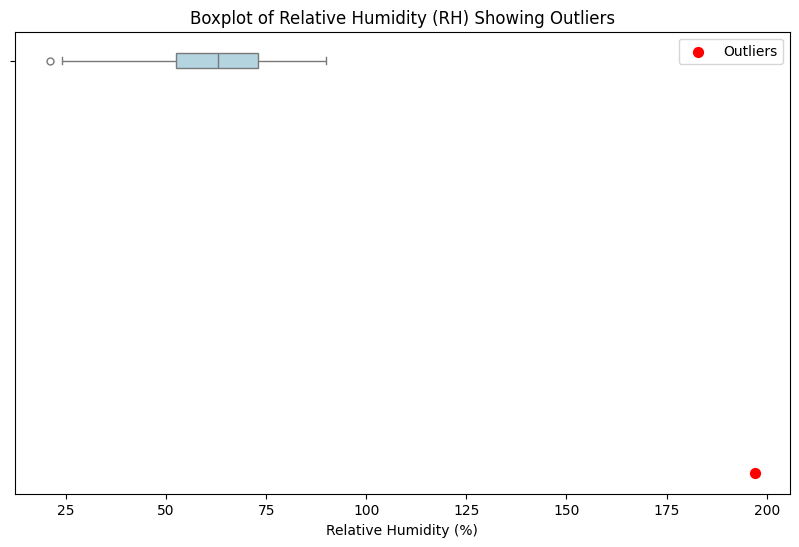

     index  Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0        1         29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1        2         29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2        3         26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3        4         25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4        5         27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..     ...          ...   ...   ...   ...   ...   ...   ...  ...   ...  ...   
242    243         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
243    244         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
244    245         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
245    246         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
246    247         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

      Classes       date  
0    not fire 2012-06-01

In [48]:
### Exploratory Data Analysis (EDA) for Outlier Detection and Removal

df['RH'] = pd.to_numeric(df['RH'], errors='coerce')
df['RH'].fillna(df['RH'].median(), inplace=True)

Q1 = df['RH'].quantile(0.25)
Q3 = df['RH'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['RH'] < lower_bound) | (df['RH'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['RH'], color='lightblue', fliersize=5)

plt.scatter(outliers.index, outliers['RH'], color='red', s=50, label='Outliers')

plt.title('Boxplot of Relative Humidity (RH) Showing Outliers')
plt.xlabel('Relative Humidity (%)')
plt.legend()
plt.show()

df = df[(df['RH'] >= lower_bound) & (df['RH'] <= upper_bound)]
print(df)


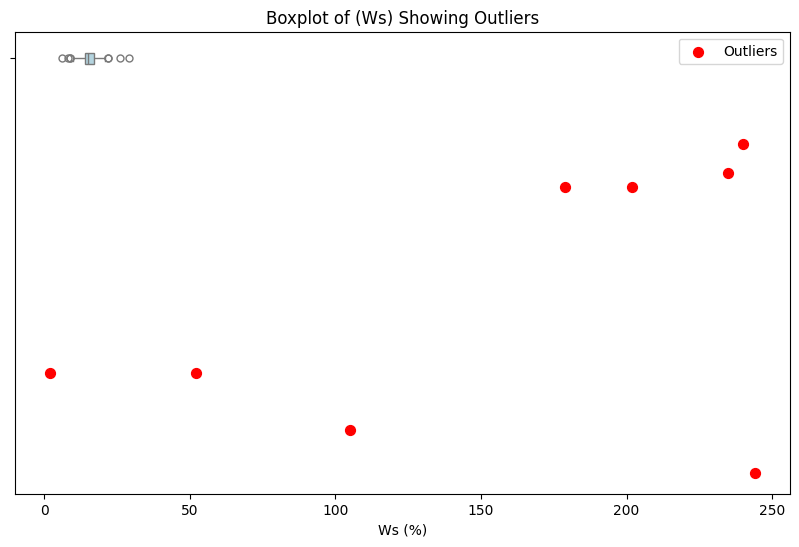

In [49]:
### Exploratory Data Analysis (EDA) for Outlier Detection and Removal


df['Ws'] = pd.to_numeric(df['Ws'], errors='coerce')
df['Ws'].fillna(df['Ws'].median(), inplace=True)

Q1 = df['Ws'].quantile(0.25)
Q3 = df['Ws'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Ws'] < lower_bound) | (df['Ws'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ws'], color='lightblue', fliersize=5)

plt.scatter(outliers.index, outliers['Ws'], color='red', s=50, label='Outliers')

plt.title('Boxplot of (Ws) Showing Outliers')
plt.xlabel('Ws (%)')
plt.legend()
plt.show()

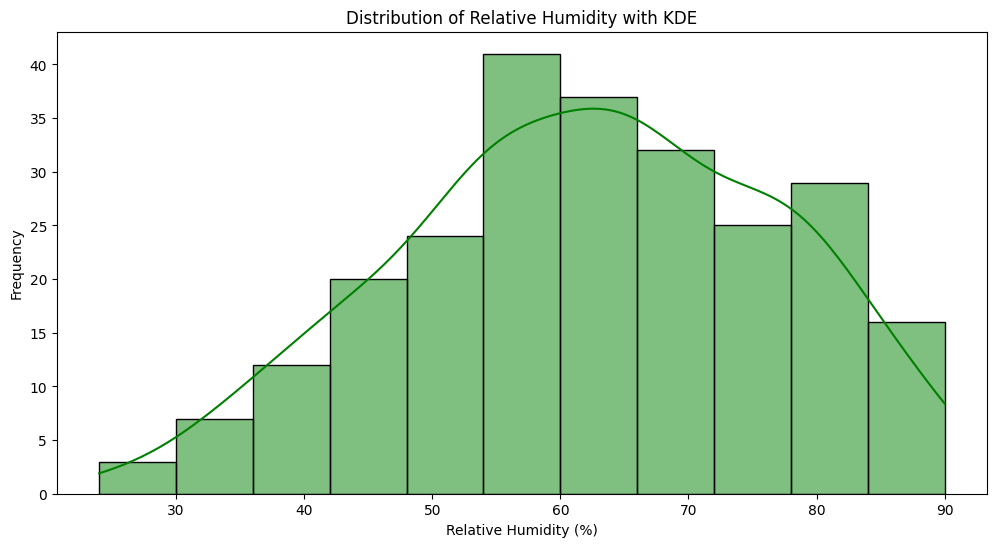

In [50]:
### Plotting the distribution of Relative Humidity (RH) with Kernel Density Estimation (KDE)

plt.figure(figsize=(12, 6))
sns.histplot(df['RH'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of Relative Humidity with KDE')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

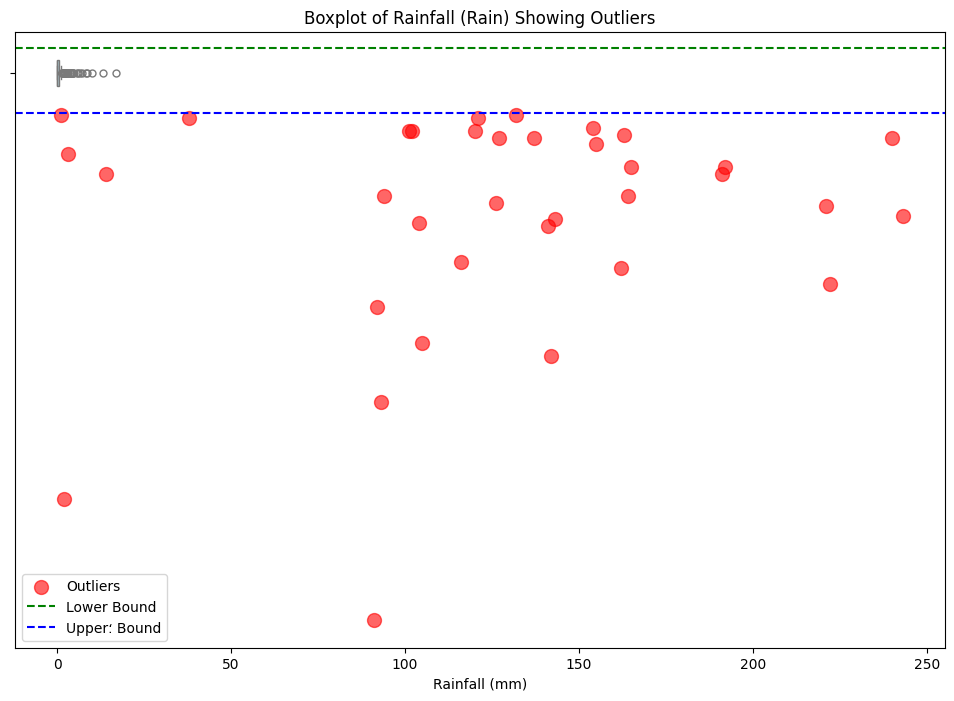

In [51]:
### Exploratory Data Analysis (EDA) for Outlier Detection and Removal


df['Rain'] = pd.to_numeric(df['Rain'], errors='coerce')
df['Rain'].fillna(df['Rain'].median(), inplace=True)

Q1 = df['Rain'].quantile(0.25)
Q3 = df['Rain'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Rain'] < lower_bound) | (df['Rain'] > upper_bound)]

plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Rain'], color='lightblue', fliersize=5)
plt.scatter(outliers.index, outliers['Rain'], color='red', s=100, label='Outliers', alpha=0.6)

plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Upper؛ Bound')

plt.title('Boxplot of Rainfall (Rain) Showing Outliers')
plt.xlabel('Rainfall (mm)')
plt.legend()




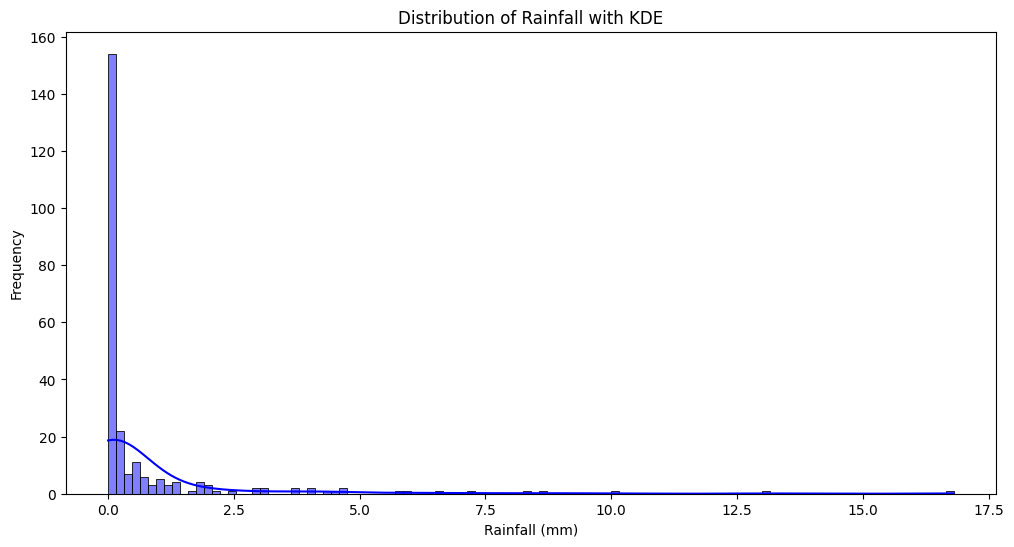

In [52]:
### Plotting the distribution of Rainfall with Kernel Density Estimation (KDE)

plt.figure(figsize=(12, 6))
sns.histplot(df['Rain'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Rainfall with KDE')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

In [53]:
### Convert the 'Classes' column into dummy/one-hot encoded variables

df = pd.get_dummies(df, columns=['Classes'], prefix='Class')

print(df.head(20))

    index  Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0       1         29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1       2         29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2       3         26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3       4         25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4       5         27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
5       6         31.0  67.0  14.0   0.0  82.6   5.8  22.2  3.1   7.0  2.5   
6       7         33.0  54.0  13.0   0.0  88.2   9.9  30.5  6.4  10.9  7.2   
7       8         30.0  73.0  15.0   0.0  86.6  12.1  38.3  5.6  13.5  7.1   
8       9         25.0  88.0  13.0   0.2  52.9   7.9  38.8  0.4  10.5  0.3   
9      10         28.0  79.0  12.0   0.0  73.2   9.5  46.3  1.3  12.6  0.9   
10     11         31.0  65.0  14.0   0.0  84.5  12.5  54.3  4.0  15.8  5.6   
11     12         26.0  81.0  19.0   0.0  84.0  13.8  61.4  4.8 

In [54]:
### convert bool to numrical
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

In [55]:
### Scaling the data using StandardScaler

df_scaled = df.copy()

columns_to_scale = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

stand = StandardScaler()
df_scaled[columns_to_scale] = stand.fit_transform(df_scaled[columns_to_scale])

df[columns_to_scale] = df_scaled[columns_to_scale]

print(df.head())

   index  Temperature        RH        Ws      Rain      FFMC       DMC  \
0      1    -0.883298 -0.351493  0.898363 -0.378542 -0.856926 -0.912283   
1      2    -0.883298 -0.076776 -0.892539  0.275117 -0.948277 -0.855352   
2      3    -1.716897  1.365488  2.331084  6.208335 -2.163953 -0.985479   
3      4    -1.994763  1.846243 -0.892539  0.878495 -3.463954 -1.083075   
4      5    -1.439031  1.022092  0.182002 -0.378542 -0.920169 -0.944815   

         DC       ISI       BUI  FWI       date  Class_fire  Class_not fire  
0 -0.875967 -0.833946 -0.934734  0.5 2012-06-01           0               1  
1 -0.875967 -0.907206 -0.899338  0.4 2012-06-02           0               1  
2 -0.886536 -1.078144 -0.984289  0.1 2012-06-03           0               1  
3 -0.890764 -1.151404 -1.055081  0.0 2012-06-04           0               1  
4 -0.736456 -0.858366 -0.899338  0.5 2012-06-05           0               1  


In [56]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Class_fire,Class_not fire
0,1,-0.883298,-0.351493,0.898363,-0.378542,-0.856926,-0.912283,-0.875967,-0.833946,-0.934734,0.5,2012-06-01,0,1
1,2,-0.883298,-0.076776,-0.892539,0.275117,-0.948277,-0.855352,-0.875967,-0.907206,-0.899338,0.4,2012-06-02,0,1
2,3,-1.716897,1.365488,2.331084,6.208335,-2.163953,-0.985479,-0.886536,-1.078144,-0.984289,0.1,2012-06-03,0,1
3,4,-1.994763,1.846243,-0.892539,0.878495,-3.463954,-1.083075,-0.890764,-1.151404,-1.055081,0.0,2012-06-04,0,1
4,5,-1.439031,1.022092,0.182002,-0.378542,-0.920169,-0.944815,-0.736456,-0.858366,-0.899338,0.5,2012-06-05,0,1


### Bulid Model By LinearRegression

In [57]:
df.isnull().sum()

,0
index,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0


In [62]:
### Detect features before Split
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI' , 'Class_fire' , 'Class_not fire']

X = df[features]
y = df['FWI']

### Split data before train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1.4994007618741545
R2 Score: 0.9545742126269279
